In [1]:
import pandas as pd
file_path = './ref/청소년정신건강20250304092136.csv'
ori = pd.read_csv(file_path)
ori

file_path1 = './ref/청소년정신건강20250304103930.csv'
ori1 = pd.read_csv(file_path1)
ori1

,시점,스트레스 인지율,스트레스 인지율.1,스트레스 인지율.2,우울감 경험률,우울감 경험률.1,우울감 경험률.2,자살 생각률,자살 생각률.1,자살 생각률.2
0,시점,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2023,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9


In [2]:
new_name = ['시점', '스트레스', '스트레스남학생', '스트레스여학생', '우울감경험률', '우울남학생', '우울여학생', '자살생각률', '자살남학생', '자살여학생']
ori.columns = new_name
ori

ori1.columns = new_name

In [3]:
# 시점을 없애고, 0번 행도 없앰.
ori = ori.loc[1:, '스트레스':]
ori

ori1 = ori1.loc[1:, '스트레스':]
ori1

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생
1,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9


In [4]:
# 2번 인덱스 행을 생성, 100에서 값을 뺀 값
ori.loc[2] = 100-ori.loc[1, '스트레스':].astype(float)
# 마지막에 응답컬럼을 생성, 그렇다 or 아니다
ori['응답'] = ['그렇다', '아니다']
ori

ori1.loc[2] = 100-ori1.loc[1, '스트레스':].astype(float)
ori1['응답'] = ['그렇다', '아니다']
ori1

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생,응답
1,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9,그렇다
2,60.4,66.6,53.8,72.5,76.7,68.0,85.5,89.5,81.1,아니다


In [5]:
# set_index로 컬럼 하나를 인덱스로 지정
ori = ori.set_index('응답')
ori

ori1 = ori1.set_index('응답')
ori1

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생
응답,,,,,,,,,
그렇다,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9
아니다,60.4,66.6,53.8,72.5,76.7,68.0,85.5,89.5,81.1


In [6]:
!pwd

/home/jovyan/data


In [7]:
# os에 사용가능한, 설치된 폰트를 나열
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
fontlist

['/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/opentype/urw-base35/C059-BdIta.otf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmmonoltcond10-regular.otf',
 '/usr/share/fonts/opentype/urw-base35/NimbusMonoPS-Italic.otf',
 '/usr/share/fonts/opentype/urw-base35/NimbusMonoPS-BoldItalic.otf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/opentype/urw-base35/URWBookman-DemiItalic.otf',
 '/usr/share/fonts/opentype/urw-base35/URWBookman-LightItalic.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmromanslant17-regular.otf',
 '/usr/share/fonts/opentype/urw-base35/NimbusRoman-BoldItalic.otf',
 '/usr/share/texmf/fonts/opentype/public/lm-math/latinmodern-math.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmromandunh10-oblique.otf',
 '/usr/share/fonts/opentype/urw-base35/P052-Italic.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmmonoslant10-regular.otf',
 '/u

Text(0.2, 0.4, '한글')

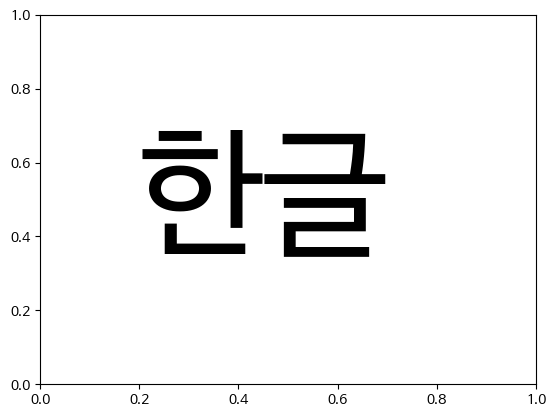

In [8]:
# 윈도우용 폰트 경로 설정
# path = 'C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf'
# font_name = fm.FontProperties(fname = path).get_name()
# rc('font', family = font_name)
# plt.text(0.3, 0.3, '한글')
# 리눅스용 폰트 경로 설정
plt.rc('font', family = 'NanumBarunGothic')
plt.text(0.2, 0.4, '한글', size = 100)

<Axes: ylabel='스트레스'>

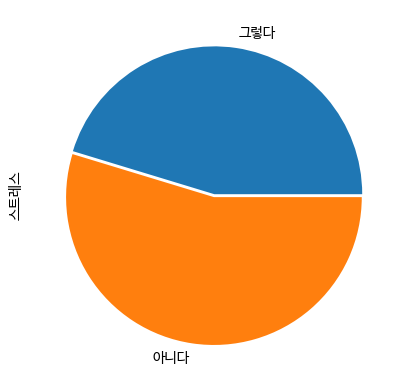

In [9]:
ori['스트레스'].astype(float).plot.pie(explode = [0, 0.02])

#ori1['스트레스'].astype(float).plot.pie(explode = [0, 0.02])

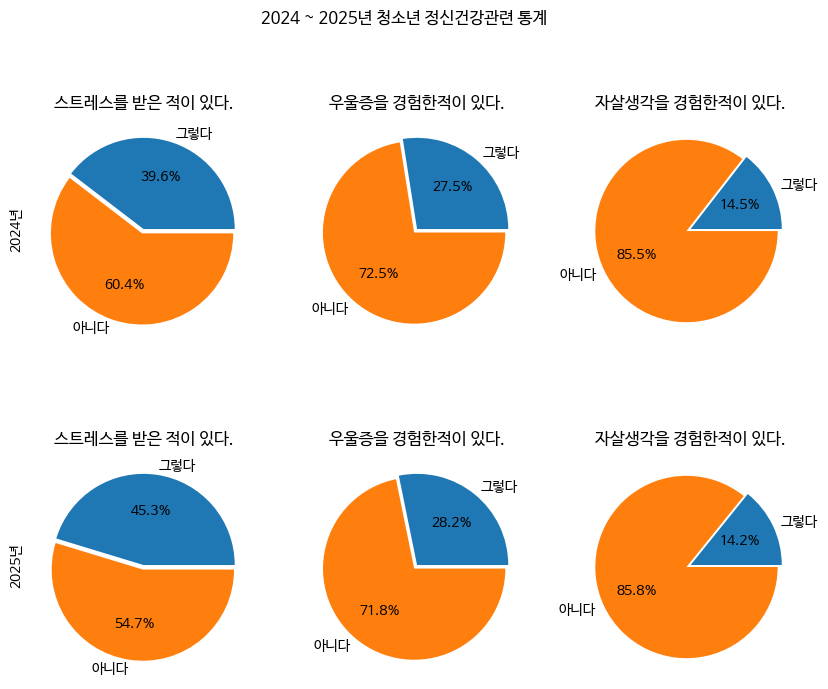

In [10]:
fig, ax= plt.subplots(2, 3, figsize = (10, 8))

ori1['스트레스'].astype(float).plot.pie(explode = [0, 0.05], ax = ax[0][0], autopct = '%.1f%%')
ax[0][0].set_title('스트레스를 받은 적이 있다.')
ax[0][0].set_ylabel('2024년')

ori1['우울감경험률'].astype(float).plot.pie(explode = [0, 0.05], ax = ax[0][1], autopct = '%.1f%%')
ax[0][1].set_title('우울증을 경험한적이 있다.')
ax[0][1].set_ylabel('')

ori1['자살생각률'].astype(float).plot.pie(explode = [0, 0.05], ax = ax[0][2], autopct = '%.1f%%')
ax[0][2].set_title('자살생각을 경험한적이 있다.')
ax[0][2].set_ylabel('')

ori['스트레스'].astype(float).plot.pie(explode = [0, 0.05], ax = ax[1][0], autopct = '%.1f%%')
ax[1][0].set_title('스트레스를 받은 적이 있다.')
ax[1][0].set_ylabel('2025년')

ori['우울감경험률'].astype(float).plot.pie(explode = [0, 0.05], ax = ax[1][1], autopct = '%.1f%%')
ax[1][1].set_title('우울증을 경험한적이 있다.')
ax[1][1].set_ylabel('')

ori['자살생각률'].astype(float).plot.pie(explode = [0, 0.05], ax = ax[1][2], autopct = '%.1f%%')
ax[1][2].set_title('자살생각을 경험한적이 있다.')
ax[1][2].set_ylabel('')

plt.suptitle('2024 ~ 2025년 청소년 정신건강관련 통계')
plt.show()